In [1]:
import pandas as pd
import numpy as np
import json
from bokeh.models import ColumnDataSource
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
sick = pd.read_csv('final_data.csv', index_col = 'Date')
pop = json.load(open('population_covid.json'))
col_list = [ i for i in sick.columns if 'dead' not in i and 'daily' not in i]
colour_list = ['#1f77b4','#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
colour = {'China':'#1f77b4','US': '#2ca02c', 'United Kingdom': '#ff7f0e'}
selection_sum = ['United Kingdom','US', 'China']
norm = 0

In [255]:
selection_sum = ['United Kingdom','Albania','China', 'US']

In [175]:
colour_list

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [256]:
colour_list = ['#1f77b4','#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']
old_colour = {i:c for i,c in zip(src.data['Country'],src.data['colour'])}
colour = {}
for i in selection_sum:
    if i in old_colour.keys():
        colour[i] = old_colour[i]
        print(len(colour_list), old_colour[i])
        colour_list.remove(old_colour[i])
for i, n in enumerate(selection_sum):
    if n not in colour.keys():
        colour[n] = colour_list[i]

9 #1f77b4
8 #8c564b
7 #9467bd
6 #2ca02c


In [257]:
old_colour,colour

({'United Kingdom': '#1f77b4',
  'US': '#2ca02c',
  'Albania': '#8c564b',
  'China': '#9467bd'},
 {'United Kingdom': '#1f77b4',
  'Albania': '#8c564b',
  'China': '#9467bd',
  'US': '#2ca02c'})

In [3]:
if len(selection_sum) >1 :
    selection_sum = [i for i in selection_sum if i != 'No selection']
else : selection_sum = selection_sum

sel_daily = [i+'_daily' for i in list(set(selection_sum))]
sel_dead = [i+'_dead' for i in selection_sum]
sel_daily_dead = [i+'_dead' for i in sel_daily]
sel_daily_roll = [i+'_roll' for i in sel_daily]
sel_daily_dead_roll = [i+'_roll' for i in sel_daily_dead]

df = sick[selection_sum + sel_daily + sel_dead+ sel_daily_dead]

# trendline
days = 7
for i in sel_daily:
    df[i+'_roll'] = df[i].rolling(window = days).mean()
    df[i+'_dead_roll'] = df[i+'_dead'].rolling(window = days).mean()

#normalise with 100.000 population
if norm != 0:
    try:
        selection_sum.remove('No selection')
    except: None

    temp = pd.DataFrame()
    for i in selection_sum:

        n = (pop['data'][i])
        temp1 = df.loc[:,[ii for ii in df.columns if i in ii]] / (n)
        temp = pd.concat((temp, temp1), axis = 1) 
        #print(temp1)
        s_cds = temp
else: s_cds = df.copy()

s_cds.reset_index(inplace= True)

s_cds['Date'] = pd.to_datetime(s_cds['Date'])

#melts and combine sum values and diff values to a single df
a1 = pd.melt(s_cds, id_vars = 'Date', value_vars = selection_sum, var_name = 'Country' )
a2 = pd.melt(s_cds, id_vars = 'Date', value_vars = sel_daily, var_name = 'Country',value_name = 'value_day' )
a3 = pd.melt(s_cds, id_vars = 'Date', value_vars = sel_dead, var_name = 'Country',value_name = 'value_dead' )
a4 = pd.melt(s_cds, id_vars = 'Date', value_vars = sel_daily_dead, var_name = 'Country',value_name = 'value_day_dead' )
a5 = pd.melt(s_cds, id_vars = 'Date', value_vars = sel_daily_roll, var_name = 'Country', value_name = 'value_day_roll')
a6 = pd.melt(s_cds, id_vars = 'Date', value_vars = sel_daily_dead_roll, var_name = 'Country', value_name = 'value_day_dead_roll')


s_cds = pd.concat([a1,a2['value_day'],
                   a3['value_dead'],
                   a4['value_day_dead'],
                   a5['value_day_roll'],
                   a6['value_day_dead_roll']], axis = 1, ignore_index= True)
s_cds.columns = ['Date', 'Country', 'value','value_day','value_dead','value_day_dead','value_day_roll','value_day_dead_roll']

#get rid of empty dates exept if 'No selection' is there
s_cds = s_cds.applymap(lambda x: np.NaN if x == 0 else x)
if 'No selection' not in s_cds['Country'].unique():
    s_cds.dropna(axis = 1, how = 'all', inplace = True)

# colourise
#colour = {i : c for i,c in zip(s_cds['Country'].unique(),colour_list)}
s_cds['colour'] = s_cds['Country'].map(colour)

src =  ColumnDataSource(s_cds)

In [139]:
col = {}
col = {i:c for i,c in zip(src.data['Country'],src.data['colour']) if i not in col.keys()}
'''for i,c in zip(src.data['Country'],src.data['colour']):
    if i not in col.keys():
        col[i] =c'''

"for i,c in zip(src.data['Country'],src.data['colour']):\n    if i not in col.keys():\n        col[i] =c"

In [140]:
col

{'United Kingdom': '#ff7f0e', 'US': '#2ca02c', 'China': '#1f77b4'}

In [237]:
#old_colour = {i for i in set(src.data['Country'])}
old_colour = {i: c for i,c in zip(src.data['Country'],src.data['colour'])}

In [1]:
globvar = 0

def set_globvar_to_one():
    global globvar    # Needed to modify global copy of globvar
    globvar = 1

def print_globvar():
    print(globvar)     # No need for global declaration to read value of globvar

set_globvar_to_one()
print_globvar() 

1


In [41]:
v = 'yepp'

def c():
    global v
    v=v*2
    return

def cc(v):
    print(v)

In [39]:
c()

In [42]:
cc(v)

yepp


In [2]:
import pandas as pd
import numpy as np
import random

In [65]:
df = pd.DataFrame({'a': np.random.randint(0,1000, 10000),\
                    'b': np.random.randint(100, 10000,10000),\
                   'd': np.random.randint(10, 1000, 10000)
                   #'c': [np.random.choice([*'adfc']) for i in range(1000000)]\
                  }
                  ,index = pd.date_range('19990101','20260518')
                   )
df

,a,b,d
1999-01-01,751,8046,477
1999-01-02,955,2707,989
1999-01-03,226,7893,183
1999-01-04,798,9365,933
1999-01-05,162,5172,926
...,...,...,...
2026-05-14,132,7755,659
2026-05-15,50,1529,774
2026-05-16,42,115,407
2026-05-17,887,1676,778


In [77]:
cor = df.corr()

In [79]:
mask = np.triu(np.ones_like(cor), k=1)
mask

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

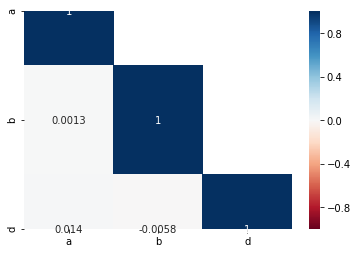

In [105]:
fig, ax = plt.subplots(1,1)
ax = sns.heatmap(cor, mask = mask,vmin=-1, vmax=1,  cmap = 'RdBu', annot = True)
ax.texts.
plt.show()

In [108]:
cor.index = ['first', 'sec', 'third']

In [111]:
cor

,a,b,d
first,1.000000,0.001349,0.013848
sec,0.001349,1.000000,-0.005784
third,0.013848,-0.005784,1.000000
